In [1]:
# Packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


Reading the "csv" files (Registration)


In [ ]:
df_90to99 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [ ]:
df_00to12  = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [ ]:
df_12to14  = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [ ]:
df_15to16 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [ ]:
df_17ToTill =pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [ ]:
print(df_90to99.info(), df_00to12.info(), df_12to14.info(), df_15to16.info(), df_17ToTill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 

In [ ]:
# List of DataFrame names
dataframes = ['df_90to99', 'df_00to12', 'df_12to14', 'df_15to16', 'df_17ToTill']

# Iterate over DataFrame names and print info() output for each DataFrame
for df_name in dataframes:
    print(f"Info for {df_name}:")
    print(eval(df_name).info(), "\n")


Info for df_90to99:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None 

Info for df_00to12:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  

In [ ]:
#  #   Column                df_90to99 df_00to12 df_12to14 df_15to16 df_17ToTill
#  0   month                  object    object    object    object    object
#  1   town                   object    object    object    object    object
#  2   flat_type              object    object    object    object    object
#  3   block                  object    object    object    object    object
#  4   street_name            object    object    object    object    object
#  5   storey_range           object    object    object    object    object
#  6   floor_area_sqm         float64   float64   float64   float64   float64
#  7   flat_model             object    object    object    object    object
#  8   lease_commence_date    int64     int64     int64     int64     int64
#  9   remaining_lease                                      int64     object
# 10   resale_price           int64     float64   float64   float64   float64


In [ ]:
df_15to16.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [ ]:
df_17ToTill.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [ ]:
# Concatenate the DataFrames
#df_90to99, 'df_00to12', 'df_12to14' does not have a "remaining_lease" column so, I choose the df_15to16 and df_17ToTill only

#concadinating the df_15to16 and df_15to16

df = pd.concat([df_15to16, df_17ToTill], axis= 0)
df.reset_index(drop= True, inplace = True)
df.tail(5)



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
217992,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,63 years 03 months,735000.0
217993,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,63 years 02 months,815888.0
217994,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,67 years 02 months,1032000.0
217995,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,62 years 05 months,800000.0
217996,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,62 years 09 months,948000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217997 entries, 0 to 217996
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                217997 non-null  object 
 1   town                 217997 non-null  object 
 2   flat_type            217997 non-null  object 
 3   block                217997 non-null  object 
 4   street_name          217997 non-null  object 
 5   storey_range         217997 non-null  object 
 6   floor_area_sqm       217997 non-null  float64
 7   flat_model           217997 non-null  object 
 8   lease_commence_date  217997 non-null  int64  
 9   remaining_lease      217997 non-null  object 
 10  resale_price         217997 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.3+ MB


In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Encoding the catogarical columns and
changing the datatype


In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [ ]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

#droping the "street_name" and "block"
df_1= df.drop(columns=["block","street_name"])

In [ ]:
df_1.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [ ]:
# for month
df_1["month"] = pd.to_datetime(df_1["month"], format="%Y-%m")
#spliting the month column to "Year", "month", "day"
df_1["year"]= df_1["month"].dt.year
df_1["month"]= df_1["month"].dt.month
df_1.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [ ]:
df_1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [ ]:
df_1['town'].nunique()

26

In [ ]:
df_1['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [ ]:

df_1['flat_type'].nunique()


7

In [ ]:
df_1['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [ ]:
df_1['flat_model'].nunique()

21

In [ ]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_1["town"]= LabelEncoder().fit_transform(df_1["town"])
df_1["flat_model"]= OrdinalEncoder().fit_transform(df_1[["flat_model"]])
df_1["flat_type"]= OrdinalEncoder().fit_transform(df_1[["flat_type"]])


In [ ]:
df_1['town'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
df_1["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [ ]:
df_1["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [ ]:
df_1.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
217992,5,25,5.0,04 TO 06,145.0,3.0,1988,63 years 03 months,735000.0,360 YISHUN RING RD,2024
217993,5,25,5.0,01 TO 03,146.0,7.0,1988,63 years 02 months,815888.0,355A YISHUN RING RD,2024
217994,5,25,5.0,01 TO 03,169.0,3.0,1992,67 years 02 months,1032000.0,292 YISHUN ST 22,2024
217995,5,25,5.0,10 TO 12,142.0,3.0,1987,62 years 05 months,800000.0,643 YISHUN ST 61,2024
217996,5,25,5.0,04 TO 06,154.0,7.0,1988,62 years 09 months,948000.0,834 YISHUN ST 81,2024


In [ ]:
df_1[["storey_start", "storey_end"]]= df_1["storey_range"].str.split(" TO ",expand=True)
#droping the "storey_range" column
df_1.drop(columns=["storey_range"],inplace= True)

In [ ]:
df_1.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [ ]:
df_1['address'].nunique()

9589

In [ ]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_1["address"]= LabelEncoder().fit_transform(df_1["address"])


In [ ]:
df_1["storey_start"]= df_1["storey_start"].astype(int)
df_1["storey_end"]= df_1["storey_end"].astype(int)

In [ ]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_1["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [ ]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])


In [ ]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [ ]:
df_1.drop(columns=['remaining_lease'],inplace= True)

In [ ]:
df_2 = pd.concat([df_1,df_data],axis=1)

In [ ]:
df_2.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [ ]:
df_3 = df_2[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]


In [ ]:
df_4 = df_3.sort_values(by=["year","month"])

In [ ]:
df_4.to_csv('SingaporeResaleFlatprice',index=False)

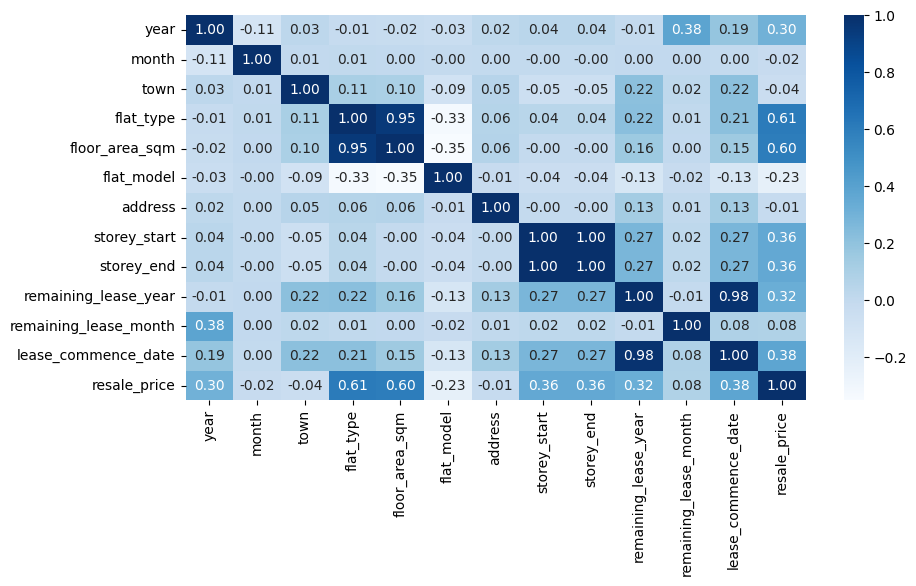

In [ ]:
# Checking the Correlation using heatmap

df_4_corr= df_4.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_4_corr,annot= True, cmap="Blues", fmt=".2f")
plt.show()


In [6]:
df_final = pd.read_csv("/content/SingaporeResaleFlatprice")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0


In [7]:
df_final.duplicated().sum()

312

In [8]:
df_final = df_final.drop_duplicates()
df_final.reset_index(drop= True,inplace= True)

In [9]:
df_final.duplicated().sum()

0

In [10]:
df_final=df_final.drop(columns=["month","address"])
df_final.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
217683,2024,25,5.0,142.0,3.0,10,12,62,5,1987,800000.0
217684,2024,25,5.0,154.0,7.0,4,6,62,9,1988,948000.0


In [11]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


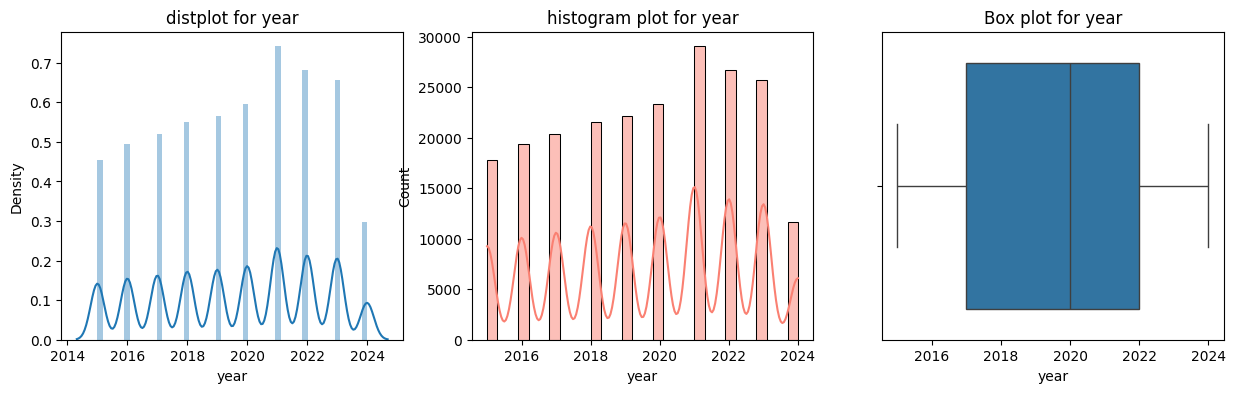

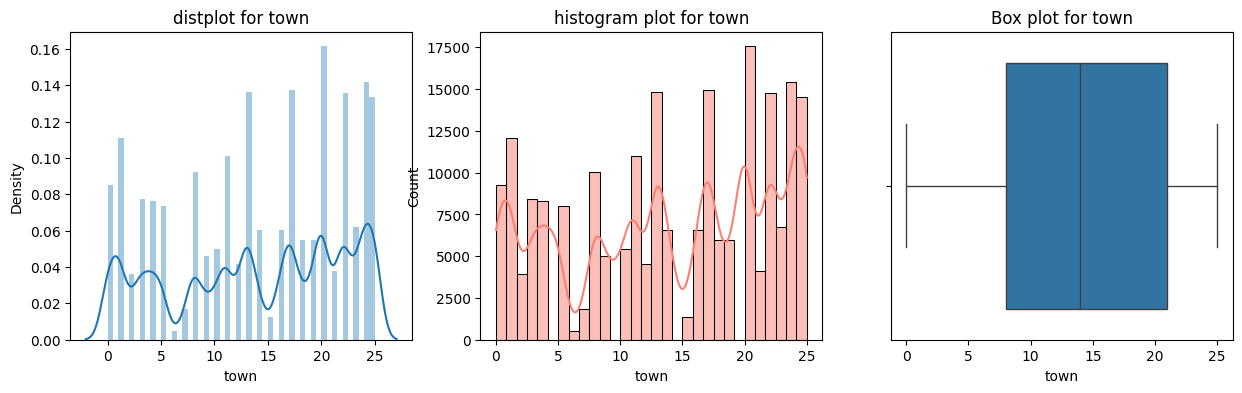

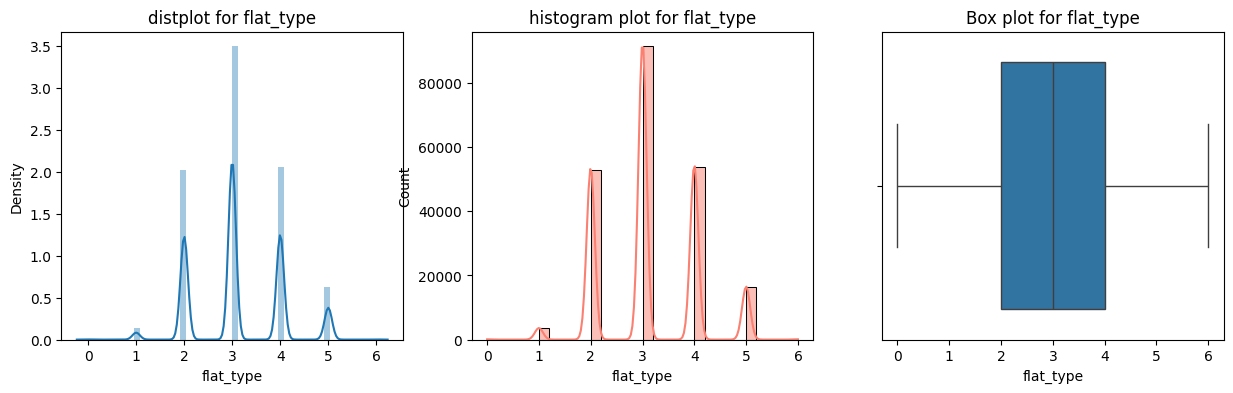

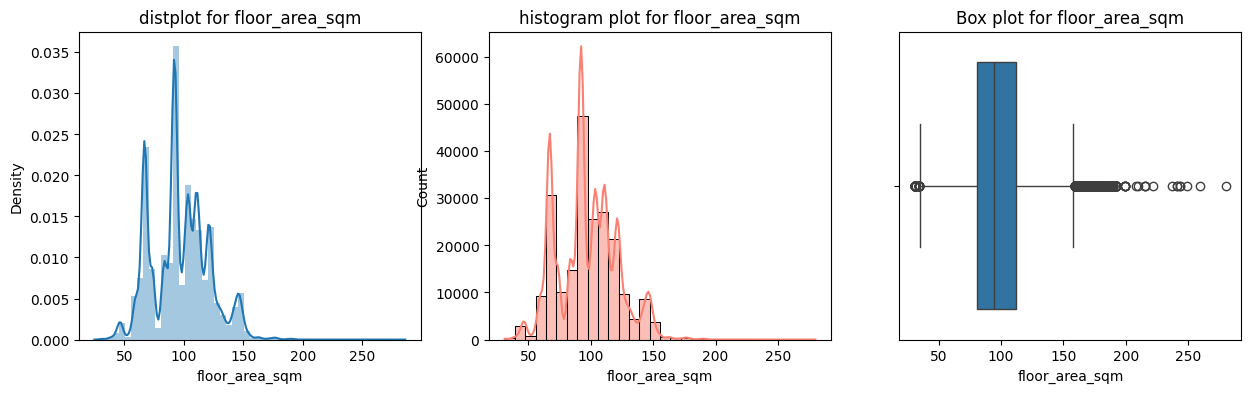

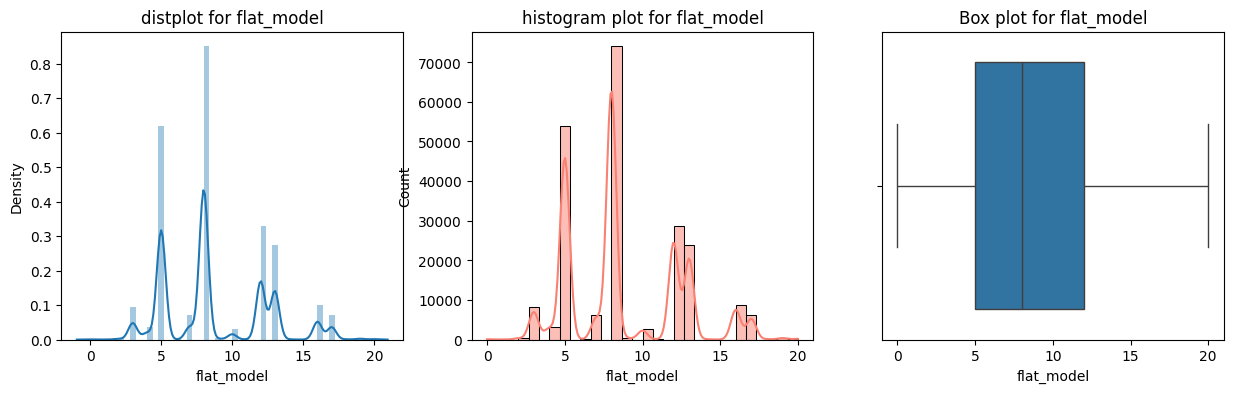

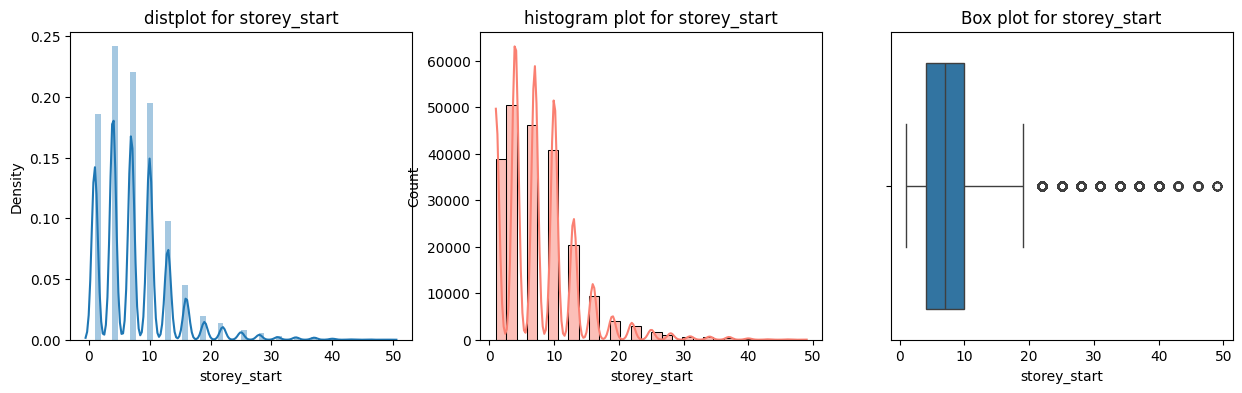

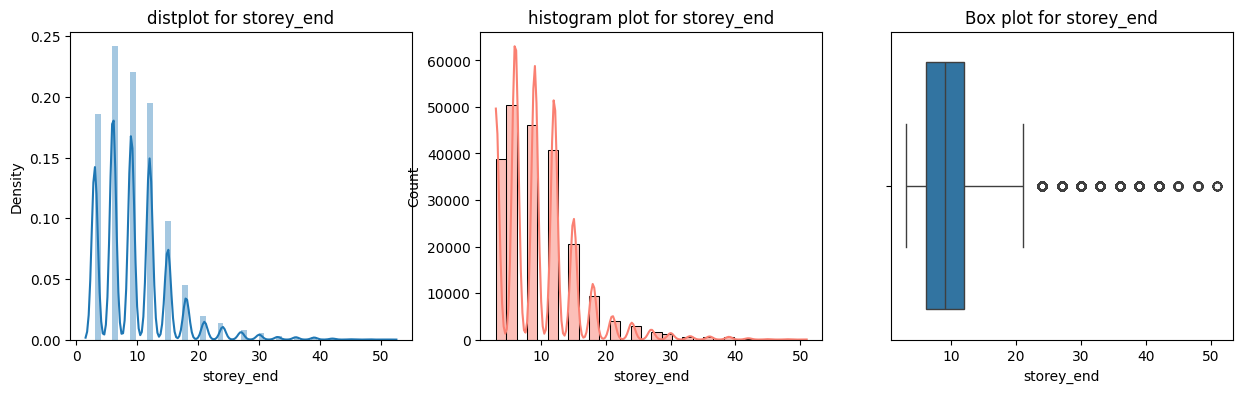

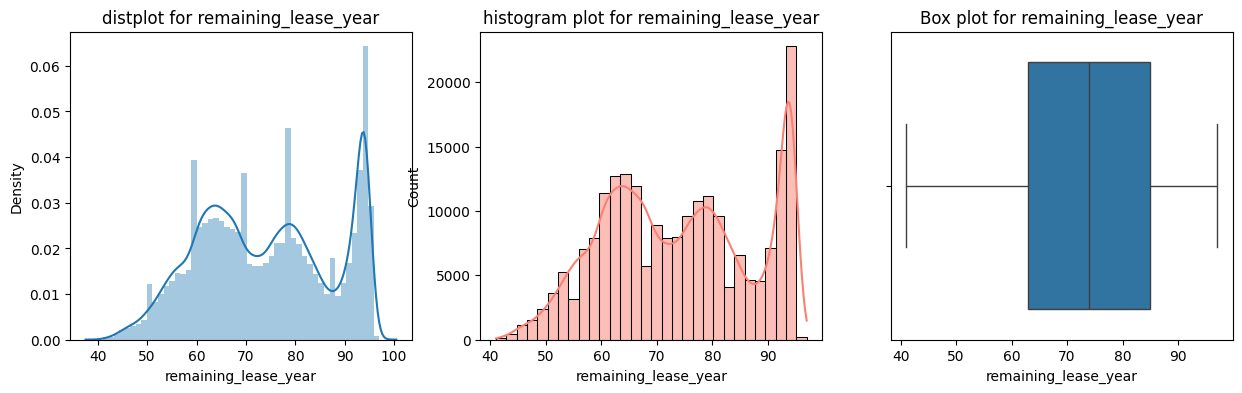

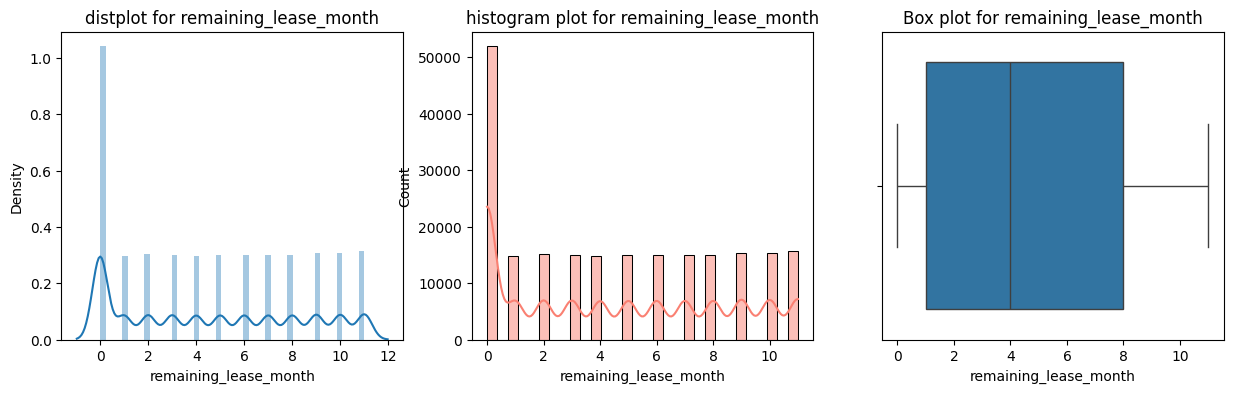

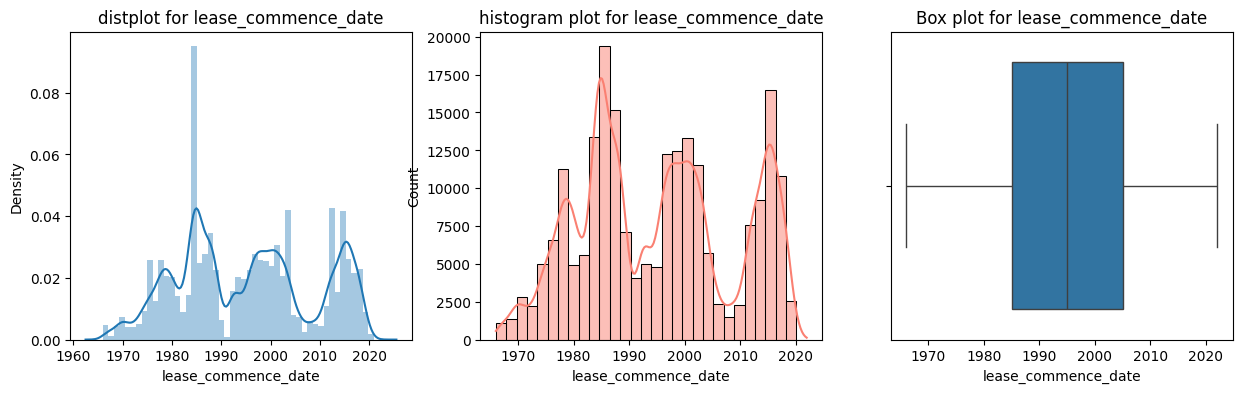

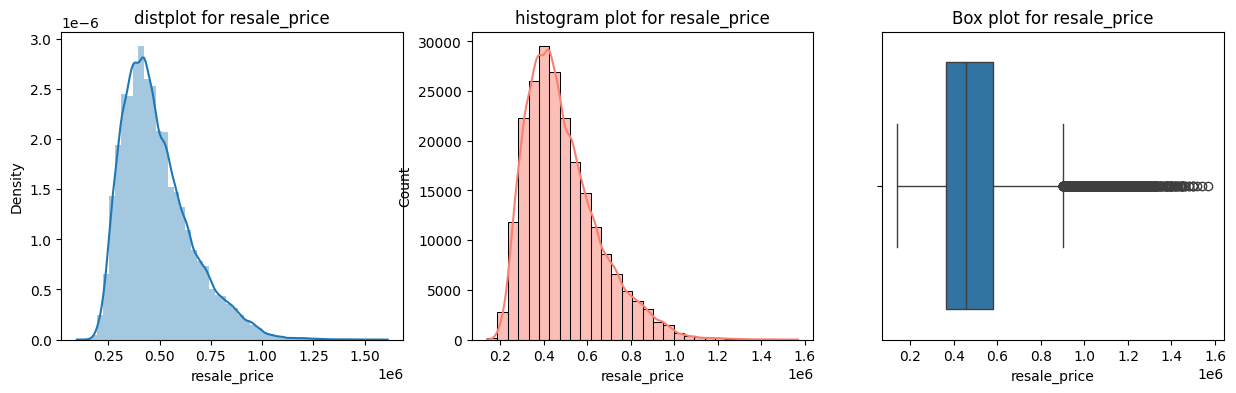

In [12]:
for i in df_final.columns:
    plot(df_final,i)

In [13]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217685.0,2019.604286,2.681943,2015.0,2017.0,2020.0,2022.0,2024.0
town,217685.0,13.892220,7.956182,0.0,8.0,14.0,21.0,25.0
flat_type,217685.0,3.120890,0.919333,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,217685.0,97.136936,24.058847,31.0,81.0,94.0,112.0,280.0
flat_model,217685.0,8.690796,3.646396,0.0,5.0,8.0,12.0,20.0
storey_start,217685.0,7.656504,5.843554,1.0,4.0,7.0,10.0,49.0
storey_end,217685.0,9.656504,5.843554,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,217685.0,74.099708,13.475527,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,217685.0,4.600510,3.782262,0.0,1.0,4.0,8.0,11.0
lease_commence_date,217685.0,1995.138278,13.680653,1966.0,1985.0,1995.0,2005.0,2022.0


## skewness handling


In [14]:
df_final_1 = df_final.copy()

In [ ]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price


In [15]:
df_final_1["storey_start"]= np.log(df_final_1["storey_start"])
df_final_1["storey_end"]= np.log(df_final_1["storey_end"])
df_final_1["resale_price"]= np.log(df_final_1["resale_price"])

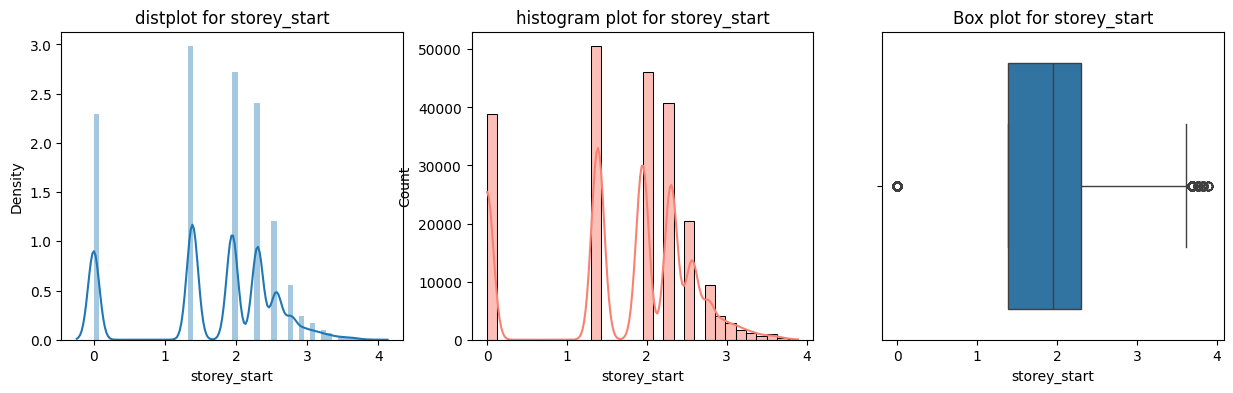

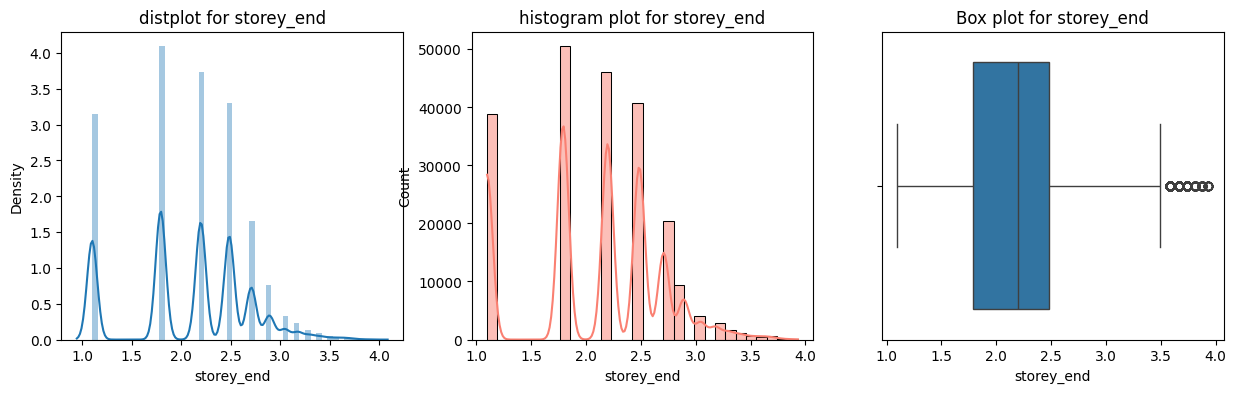

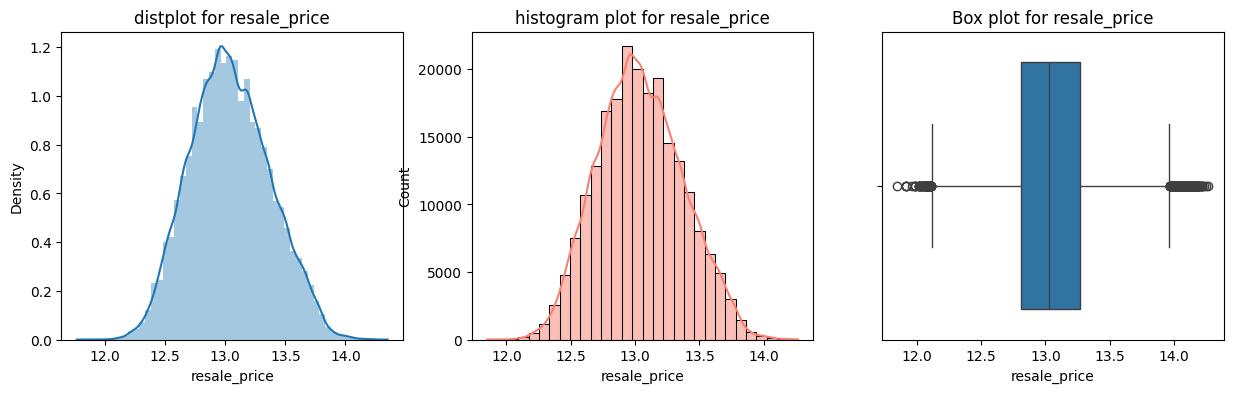

In [16]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_1,i)

## Outliers Handling - Interquartile Range(IQR) Method


In [17]:
df_final_2 = df_final_1.copy()

In [ ]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [18]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [19]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_2,j)

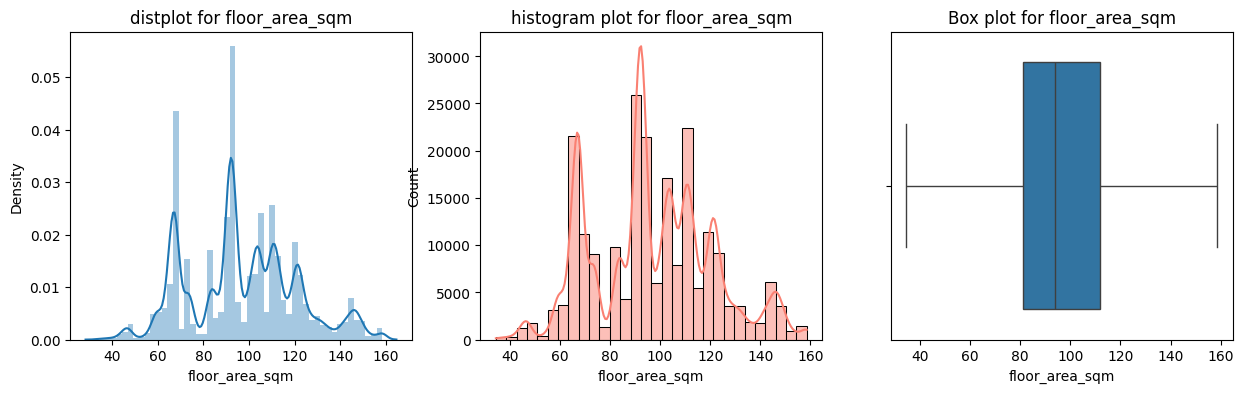

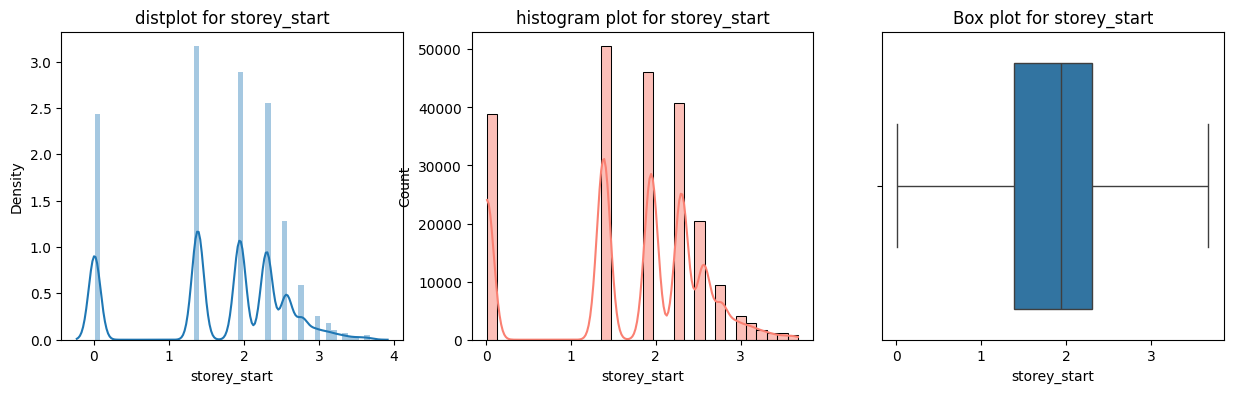

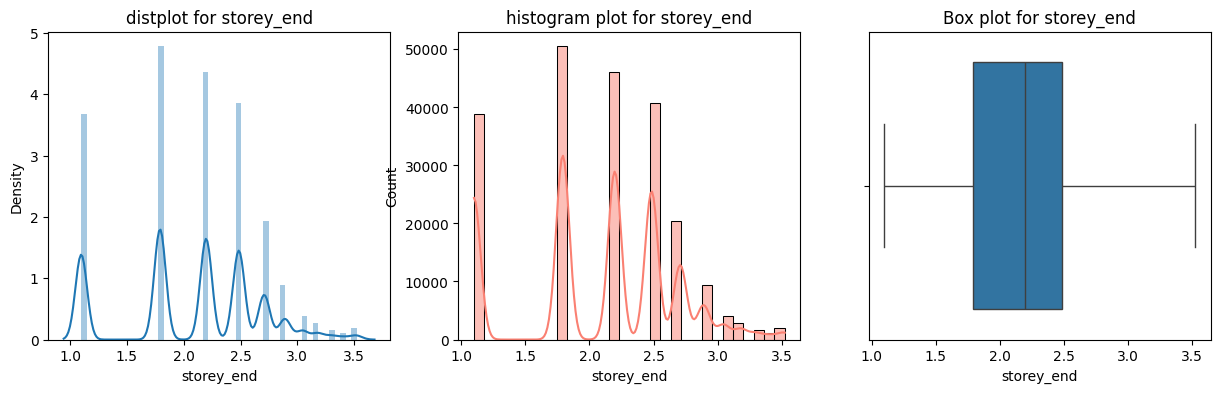

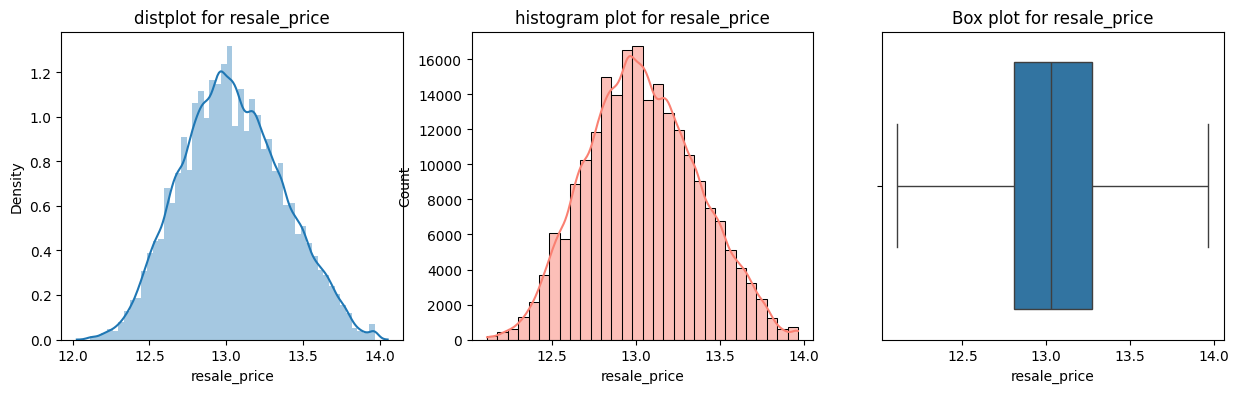

In [20]:
for k in outlier_columns:
    plot(df_final_2,k)


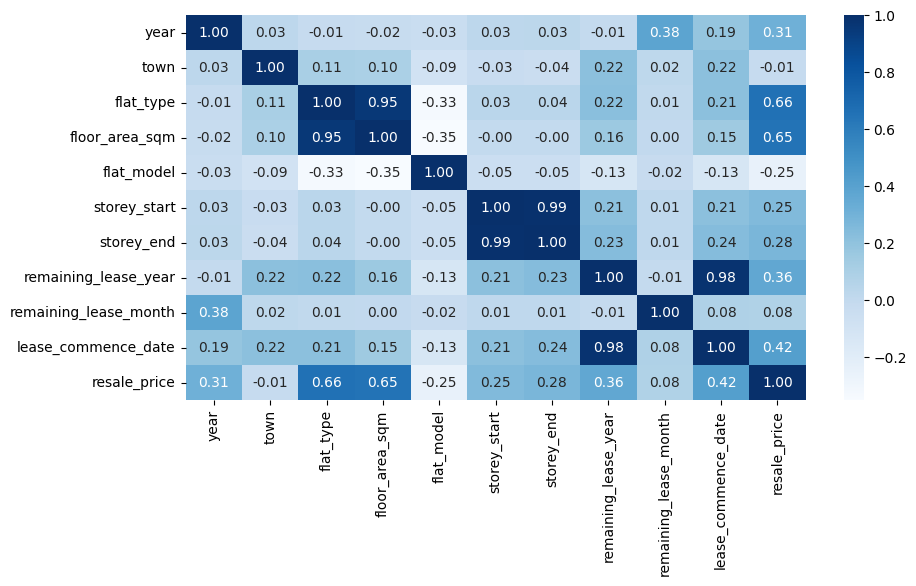

In [21]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_2.corr(), annot= True, cmap="Blues", fmt="0.2f")
plt.show()

In [ ]:
## ML REGRESSION

In [22]:
df_final_3 = df_final_2.copy()

In [23]:
df_final_3.describe().T

,count,mean,std,min,25%,50%,75%,max
year,217685.0,2019.604286,2.681943,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,217685.0,13.892220,7.956182,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,217685.0,3.120890,0.919333,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,217685.0,97.063732,23.825217,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,217685.0,8.690796,3.646396,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,217685.0,1.695395,0.920803,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,217685.0,2.093216,0.601209,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,217685.0,74.099708,13.475527,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,217685.0,4.600510,3.782262,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,217685.0,1995.138278,13.680653,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


In [24]:
np.exp(13.965480)

1161798.7399814494

In [25]:
#checking how many datas are outliers based on resale_price
df_final[df_final["resale_price"] >= 1161798]


,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
38448,2017,2,4.0,120.0,4.0,40,42,93,7,2011,1180000.0
72746,2018,14,2.0,237.0,18.0,1,3,52,10,1972,1185000.0
74209,2018,7,4.0,106.0,20.0,40,42,91,3,2011,1168000.0
79804,2019,14,4.0,117.0,4.0,37,39,90,11,2011,1185000.0
83922,2019,4,4.0,112.0,5.0,34,36,95,10,2016,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...
216812,2024,18,4.0,110.0,5.0,19,21,83,3,2008,1250000.0
217109,2024,21,5.0,146.0,7.0,4,6,60,9,1986,1180000.0
217110,2024,21,5.0,146.0,7.0,4,6,60,9,1986,1200000.0
217358,2024,23,4.0,110.0,4.0,16,18,87,0,2012,1310000.0


In [26]:
np.exp(12.112957)

182217.62618671462

In [27]:
df_final[df_final["resale_price"] <= 182217]

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,4,0.0,31.0,5.0,4,6,56,8,1975,175000.0
62238,2018,10,1.0,42.0,17.0,4,6,49,9,1969,180000.0
62989,2018,21,2.0,64.0,5.0,13,15,59,2,1978,170000.0
64274,2018,15,1.0,42.0,5.0,1,3,55,11,1975,180000.0
64913,2018,23,1.0,40.0,17.0,4,6,49,1,1968,182000.0
...,...,...,...,...,...,...,...,...,...,...,...
124864,2021,4,0.0,31.0,5.0,4,6,53,3,1975,182000.0
126747,2021,24,1.0,45.0,5.0,7,9,64,5,1986,180000.0
127297,2021,4,0.0,31.0,5.0,4,6,53,1,1975,180000.0
197151,2023,22,2.0,67.0,8.0,7,9,91,3,2015,150000.0


In [28]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [29]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [30]:
select_model(df_final_3, LinearRegression)
select_model(df_final_3, DecisionTreeRegressor)
select_model(df_final_3, RandomForestRegressor)
select_model(df_final_3, AdaBoostRegressor)
select_model(df_final_3, GradientBoostingRegressor)


{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6750280610572281, 'Mean_squared_error': 0.03567104956858199, 'Root_mean_squared_error': 0.18886780977334913, 'Mean_absolute_error': 0.1478192882021341}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6741005438922956, 'Mean_squared_error': 0.03573916099574802, 'Root_mean_squared_error': 0.18904803885718577, 'Mean_absolute_error': 0.1480803196676671}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962334237928345, 'Mean_squared_error': 0.00041344408697792677, 'Root_mean_squared_error': 0.020333324543171164, 'Mean_absolute_error': 0.00724726349992202}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9250301503570078, 'Mean_squared_error': 0.008221429879687922, 'Root_mean_squared_error': 0.090672100889347, 'Mean_absolute_error': 0.06453736549564744}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911532950181647, 'Mean_squared_error': 0.00097

In [31]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_3.drop(columns=["resale_price"])
y= df_final_3["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9543210229263488, 'Mean_squared_error': 0.005009300522480094, 'Root_mean_squared_error': 0.07077641218993863, 'Mean_absolute_error': 0.0517811892266067}


In [32]:
df_final_3.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [33]:
np.exp(12.815838)

367999.92008841544

In [34]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.810168239838477

In [35]:
np.exp(12.815079474279433)

367720.8885235499

In [37]:
import pickle
import numpy as np

In [38]:
# Saving the Model unsing pickle
with open("Singapore_Resale_FlatPrice_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [39]:
with open("Singapore_Resale_FlatPrice_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [3]:
!pip install streamlit
!pip install streamlit_option-menu
!pip install pyngrok
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 4.8 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.059s

3 packages are looking for funding
  run

In [ ]:
# Streamlit Part

In [42]:
%%writefile Resale_Flat_Price.py
import pandas as pd
import numpy as np
import streamlit as st
from streamlit_option_menu import option_menu
from datetime import datetime
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

#READING THE CLEANED DATAFRAME

#df = pd.read_csv("/content/SingaporeResaleFlatprice")

def town_mapping(town_map):
    if town_map == 'ANG MO KIO':
        town_1 = int(0)
    elif town_map == 'BEDOK':
        town_1 = int(1)
    elif town_map == 'BISHAN':
        town_1= int(2)
    elif town_map == 'BUKIT BATOK':
        town_1= int(3)
    elif town_map == 'BUKIT MERAH':
        town_1= int(4)
    elif town_map == 'BUKIT PANJANG':
        town_1= int(5)

    elif town_map == 'BUKIT TIMAH':
        town_1= int(6)
    elif town_map == 'CENTRAL AREA':
        town_1= int(7)
    elif town_map == 'CHOA CHU KANG':
        town_1= int(8)
    elif town_map == 'CLEMENTI':
        town_1= int(9)
    elif town_map == 'GEYLANG':
        town_1= int(10)

    elif town_map == 'HOUGANG':
        town_1 = int(11)
    elif town_map == 'JURONG EAST':
        town_1= int(12)
    elif town_map == 'JURONG WEST':
        town_1= int(13)
    elif town_map == 'KALLANG/WHAMPOA':
        town_1= int(14)
    elif town_map == 'MARINE PARADE':
        town_1= int(15)

    elif town == 'PASIR RIS':
        town_1= int(16)
    elif town == 'PUNGGOL':
        town_1= int(17)
    elif town == 'QUEENSTOWN':
        town_1= int(18)
    elif town == 'SEMBAWANG':
        town_1= int(19)
    elif town == 'SENGKANG':
        town_1= int(20)

    elif town == 'SERANGOON':
        town_1= int(21)
    elif town == 'TAMPINES':
        town_1= int(22)
    elif town == 'TOA PAYOH':
        town_1= int(23)
    elif town == 'WOODLANDS':
        town_1= int(24)
    elif town == 'YISHUN':
        town_1= int(25)

    return town_1

def flat_type_mapping(flt_type):

    if flt_type == '3 ROOM':
        flat_type_1= int(2)
    elif flt_type == '4 ROOM':
        flat_type_1= int(3)
    elif flt_type == '5 ROOM':
        flat_type_1= int(4)
    elif flt_type == '2 ROOM':
        flat_type_1= int(1)
    elif flt_type == 'EXECUTIVE':
        flat_type_1= int(5)
    elif flt_type == '1 ROOM':
        flat_type_1= int(0)
    elif flt_type == 'MULTI-GENERATION':
        flat_type_1= int(6)

    return flat_type_1

def flat_model_mapping(fl_m):

    if fl_m == 'Improved':
        flat_model_1= int(5)
    elif fl_m == 'New Generation':
        flat_model_1= int(12)

    elif fl_m == 'Model A':
        flat_model_1= int(8)
    elif fl_m == 'Standard':
        flat_model_1= int(17)
    elif fl_m == 'Simplified':
        flat_model_1= int(16)
    elif fl_m == 'Premium Apartment':
        flat_model_1= int(13)
    elif fl_m == 'Maisonette':
        flat_model_1= int(7)

    elif fl_m == 'Apartment':
        flat_model_1= int(3)
    elif fl_m == 'Model A2':
        flat_model_1= int(10)
    elif fl_m == 'Type S1':
        flat_model_1= int(19)
    elif fl_m == 'Type S2':
        flat_model_1= int(20)
    elif fl_m == 'Adjoined flat':
        flat_model_1= int(2)

    elif fl_m == 'Terrace':
        flat_model_1= int(18)
    elif fl_m == 'DBSS':
        flat_model_1= int(4)
    elif fl_m == 'Model A-Maisonette':
        flat_model_1= int(9)
    elif fl_m == 'Premium Maisonette':
        flat_model_1= int(15)
    elif fl_m == 'Multi Generation':
        flat_model_1= int(11)

    elif fl_m == 'Premium Apartment Loft':
        flat_model_1= int(14)
    elif fl_m == 'Improved-Maisonette':
        flat_model_1= int(6)
    elif fl_m == '2-room':
        flat_model_1= int(0)
    elif fl_m == '3Gen':
        flat_model_1= int(1)

    return flat_model_1


# df = pd.read_csv("/content/SingaporeResaleFlatprice.csv")
# model_path = r"Resale_Flat_Prices_Model_1.pkl"
# model_loaded = False
# if not os.path.exists(model_path):
#     st.error(f"Model file not found: {model_path}")
# else:
#     with open(model_path, "rb") as f:
#         regg_model = pickle.load(f)
#         model_loaded = True

def predict_price(year,town,flat_type,flr_area_sqm,flat_model,stry_start,stry_end,re_les_year,
              re_les_month,les_coms_dt):

    year_1= int(year)
    town_2= town_mapping(town)
    flt_ty_2= flat_type_mapping(flat_type)
    flr_ar_sqm_1= int(flr_area_sqm)
    flt_model_2= flat_model_mapping(flat_model)
    str_str= np.log(int(stry_start))
    str_end= np.log(int(stry_end))
    rem_les_year= int(re_les_year)
    rem_les_month= int(re_les_month)
    lese_coms_dt= int(les_coms_dt)

    with open("Singapore_Resale_FlatPrice_Model_1.pkl","rb") as f:
              regg_model= pickle.load(f)


    user_data = np.array([[year_1, town_2, flt_ty_2, flr_ar_sqm_1, flt_model_2, str_str, str_end, rem_les_year, rem_les_month, lese_coms_dt]])
    y_pred_1 = regg_model.predict(user_data)
    price = np.exp(y_pred_1[0])

    return round(price)


st.set_page_config(layout="wide")

st.title("SINGAPORE RESALE FLAT PRICES PREDICTING")
st.markdown("""
    <style>
    .main {
        padding: 0!important;
        background-color: blue;
    }
    .css-18e3th9 {
        padding: 0px 10px;
    }
    .css-1d391kg {
        padding: 10px;
    }
    </style>
    """, unsafe_allow_html=True)

st.write("")

with st.sidebar:
    select= option_menu("MAIN MENU",["Home", "Price Prediction", "About"])

if select == "Home":
    st.header("HDB Flats:")

    st.write('''The majority of Singaporeans live in public housing provided by the HDB.
    HDB flats can be purchased either directly from the HDB as a new unit or through the resale market from existing owners.''')

    st.header("Resale Process:")

    st.write('''In the resale market, buyers purchase flats from existing flat owners, and the transactions are facilitated through the HDB resale process.
    The process involves a series of steps, including valuation, negotiations, and the submission of necessary documents.''')

    st.header("Valuation:")

    st.write('''The HDB conducts a valuation of the flat to determine its market value. This is important for both buyers and sellers in negotiating a fair price.''')

    st.header("Eligibility Criteria:")

    st.write("Buyers and sellers in the resale market must meet certain eligibility criteria, including citizenship requirements and income ceilings.")

    st.header("Resale Levy:")

    st.write("For buyers who have previously purchased a subsidized flat from the HDB, there might be a resale levy imposed when they purchase another flat from the HDB resale market.")

    st.header("Grant Schemes:")

    st.write("There are various housing grant schemes available to eligible buyers, such as the CPF Housing Grant, which provides financial assistance for the purchase of resale flats.")

    st.header("HDB Loan and Bank Loan:")

    st.write("Buyers can choose to finance their flat purchase through an HDB loan or a bank loan. HDB loans are provided by the HDB, while bank loans are obtained from commercial banks.")

    st.header("Market Trends:")

    st.write("The resale market is influenced by various factors such as economic conditions, interest rates, and government policies. Property prices in Singapore can fluctuate based on these factors.")

    st.header("Online Platforms:")

    st.write("There are online platforms and portals where sellers can list their resale flats, and buyers can browse available options.")


elif select == "Price Prediction":
  col1,col2= st.columns(2)
  with col1:

        year= st.selectbox("Select the Year",["2015", "2016", "2017", "2018", "2019", "2020", "2021",
                           "2022", "2023", "2024"])

        town= st.selectbox("Select the Town", ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
                                            'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
                                            'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
                                            'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
                                            'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
                                            'TOA PAYOH', 'WOODLANDS', 'YISHUN'])

        flat_type= st.selectbox("Select the Flat Type", ['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
                                                        'MULTI-GENERATION'])

        flr_area_sqm= st.number_input("Enter the Value of Floor Area sqm (Min: 31 / Max: 280")

        flat_model= st.selectbox("Select the Flat Model", ['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
                                                        'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
                                                        'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
                                                        'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
                                                        'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'])


  with col2:

        stry_start= st.number_input("Enter the Value of Storey Start")

        stry_end= st.number_input("Enter the Value of Storey End")

        re_les_year= st.number_input("Enter the Value of Remaining Lease Year (Min: 42 / Max: 97)")

        re_les_month= st.number_input("Enter the Value of Remaining Lease Month (Min: 0 / Max: 11)")

        les_coms_dt= st.selectbox("Select the Lease_Commence_Date", [str(i) for i in range(1966,2023)])

  button= st.button("Predict the Price", use_container_width= True)

  if button:
        price = predict_price(year, town, flat_type, flr_area_sqm, flat_model, stry_start, stry_end, re_les_year, re_les_month, les_coms_dt)
        st.success(f"Predicted Resale Flat Price: ${price}")


elif select == "About":
    st.header(":purple[Data Collection and Preprocessing:]")
    st.write("Collect a dataset of resale flat transactions from the Singapore Housing and Development Board (HDB) for the years 1990 to Till Date. Preprocess the data to clean and structure it for machine learning.")

    st.header(":purple[Feature Engineering:]")
    st.write("Extract relevant features from the dataset, including town, flat type, storey range, floor area, flat model, and lease commence date. Create any additional features that may enhance prediction accuracy.")

    st.header(":purple[Model Selection and Training:]")
    st.write("Choose an appropriate machine learning model for regression (e.g., linear regression, decision trees, or random forests). Train the model on the historical data, using a portion of the dataset for training.")

    st.header(":purple[Model Evaluation:]")
    st.write("Evaluate the model's predictive performance using regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) and R2 Score.")

    st.header(":purple[Streamlit Web Application:]")
    st.write("Develop a user-friendly web application using Streamlit that allows users to input details of a flat (town, flat type, storey range, etc.). Utilize the trained machine learning model to predict the resale price based on user inputs.")

    st.header(":purple[Deployment on Render:]")
    st.write("Deploy the Streamlit application on the Render platform to make it accessible to users over the internet.")

    st.header(":purple[Testing and Validation:]")
    st.write("Thoroughly test the deployed application to ensure it functions correctly and provides accurate predictions.")




Overwriting Resale_Flat_Price.py


In [43]:
!streamlit run /content/Resale_Flat_Price.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com


34.45.237.230
npx: installed 22 in 2.655s
your url is: https://petite-camels-guess.loca.lt
